In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.models import resnet18, resnet50
from torch.utils.data import Dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from torch.utils.data.sampler import SubsetRandomSampler
import PIL
from pathlib import Path
import albumentations as A

## MyNet

In [ ]:
# class MyNet(nn.Module):

#     def __init__(self):
#         super().__init__()

#         # 3x32x32
#         self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
#         self.act1 = torch.nn.ReLU()
#         self.conv2 = torch.nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
#         self.act2 = torch.nn.ReLU()
#         self.pool1 = torch.nn.MaxPool2d(kernel_size=2)

#         # 64x16x16
#         self.conv3 = torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
#         self.act3 = torch.nn.ReLU()
#         self.conv4 = torch.nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
#         self.act4 = torch.nn.ReLU()
#         self.pool2 = torch.nn.MaxPool2d(kernel_size=2)

#         # 128x8x8
#         self.conv5 = torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
#         self.act5 = torch.nn.ReLU()
#         self.conv6 = torch.nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
#         self.act6 = torch.nn.ReLU()
#         self.pool3 = torch.nn.MaxPool2d(kernel_size=2)

#         # 256x4x4
#         self.conv7 = torch.nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
#         self.act7 = torch.nn.ReLU()
#         self.conv8 = torch.nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
#         self.act8 = torch.nn.ReLU()
#         self.pool4 = torch.nn.MaxPool2d(kernel_size=2)

#         # 512x2x2
#         self.conv9 = torch.nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
#         self.act9 = torch.nn.ReLU()
#         self.conv10 = torch.nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
#         self.act10 = torch.nn.ReLU()
#         self.pool5 = torch.nn.MaxPool2d(kernel_size=2)

#         # Nx1x1
#         self.flatten = torch.nn.Flatten()
#         self.fc1 = torch.nn.Linear(in_features=512, out_features=1024)
#         self.fc2 = torch.nn.Linear(in_features=1024, out_features=10)

#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.act1(x)
#         x = self.conv2(x)
#         x = self.act2(x)
#         x = self.pool1(x)

#         # 64x16x16
#         x = self.conv3(x)
#         x = self.act3(x)
#         x = self.conv4(x)
#         x = self.act4(x)
#         x = self.pool2(x)

#         # 128x8x8
#         x = self.conv5(x)
#         x = self.act5(x)
#         x = self.conv6(x)
#         x = self.act6(x)
#         x = self.pool3(x)

#         # 256x4x4
#         x = self.conv7(x)
#         x = self.act7(x)
#         x = self.conv8(x)
#         x = self.act8(x)
#         x = self.pool4(x)

#         # 512x2x2
#         x = self.conv9(x)
#         x = self.act9(x)
#         x = self.conv10(x)
#         x = self.act10(x)
#         x = self.pool5(x)

#         # Nx1x1
#         x = self.flatten(x)
#         x = self.fc1(x)
#         x = self.fc2(x)
#         return x

In [ ]:
# net = MyNet()
# batch = next(iter(train_loader))
# images, labels = batch
# net(images)

In [ ]:
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# #net = MyNet().to(device)

# net = resnet18(pretrained=True).to(device)

In [ ]:
# loss_function = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)

In [ ]:
# for epoch in range(5):

#     net.train()
#     epoch_loss = 0.
#     correct = 0
#     total = 0

#     for batch in train_loader:
#         images, labels = batch
#         images = images.to(device)
#         labels = labels.to(device)

#         optimizer.zero_grad()
#         predictions = net(images)
#         correct += (labels == predictions.argmax(dim=1,)).sum()
#         total += len(labels)

#         loss = loss_function(predictions, labels)
#         loss.backward()
#         optimizer.step()

#         epoch_loss += loss.item()
#     print(f'Train: {epoch_loss / len(train_loader)} | acc: {correct / total}')

#     net.eval()
#     epoch_loss = 0.
#     correct = 0
#     total = 0

#     for batch in test_loader:
#         images, labels = batch
#         images = images.to(device)
#         labels = labels.to(device)

#         predictions = net(images)

#         correct += (labels == predictions.argmax(dim=1,)).sum()
#         total += len(labels)

#         with torch.no_grad():
#             loss = loss_function(predictions, labels)

#         epoch_loss += loss.item()
#     print(f'Test: {epoch_loss / len(test_loader)} | acc: {correct / total}')



## 2 Localisation
### 2.1 Dataset & dataloader


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/MyDrive/bird_species"

/content/drive/MyDrive/bird_species


In [ ]:
data_path = './bird_dataset/' #путь до папки с датасетом
img_path = './bird_dataset/bird_img'
json_path = './bird_dataset/bird_bbox/'

### test

In [ ]:
transform = transforms.Compose(
        [transforms.Resize([224, 224]),
         transforms.ToTensor(),
        #  transforms.RandomEqualize(p=1),
         transforms.RandomAutocontrast(p=1),
         transforms.GaussianBlur(1, sigma=(0.1, 0.2)),
         transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                              std=[0.229, 0.224, 0.225])])


In [ ]:
dataset = datasets.ImageFolder(img_path, transform=transform)

In [ ]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

In [ ]:
with open(os.path.join(json_path, 'bird_bboxes.json'), 'r') as j:
  objects = json.load(j)
objects = sorted(objects, key=lambda k: k['annotations'][0]['task'])
obj = objects[86]
obj['file_upload']

'1_Hazel_Grouse_0006_GlAC9J7.jpg'

In [ ]:
def rename_img(name):
  if '.jpeg' in name:
    newname = name[:-13]+'.jpeg'
  else:
    newname = name[:-12]+'.jpg'
  return newname

name = obj['file_upload']
new_name = rename_img(name)

In [ ]:
#попытка получить имя файла
# .split('/')[-1].index(sample_fname)
sample_fname, _ = dataset.samples[76]
sample_fname
# dataset.samples[:,1]

'./bird_dataset/bird_img/Eurasian_Tree_Sparrow/1_Eurasian_Tree_Sparrow_0031.jpg'

In [ ]:
name.split('_')[-1]

'GlAC9J7.jpg'

In [ ]:
values = obj['annotations'][0]['result'][0]['value']
object_label = values['rectanglelabels'][0]
print(object_label)

def map_label(label):
  if label == 'Eurasian_Pygmy-owl':
    return 0
  elif label == 'Eurasian_Tree_Sparrow':
    return 1
  elif label == 'Hazel_Grouse':
    return 2

label = map_label(object_label)
print(label)

Hazel_Grouse
2


In [ ]:
image = PIL.Image.open(Path(img_path) / object_label / new_name )

image = transform(image)
print(image.size())
image

torch.Size([3, 224, 224])


tensor([[[ 0.2003,  0.2183,  0.2542,  ...,  0.4159,  0.4339,  0.4339],
         [ 0.2003,  0.2183,  0.2542,  ...,  0.4159,  0.4339,  0.4339],
         [ 0.1823,  0.2183,  0.2722,  ...,  0.4159,  0.4339,  0.4339],
         ...,
         [ 1.2066,  1.2426,  1.2426,  ..., -0.1951, -0.3568, -0.3927],
         [ 1.1527,  1.1887,  1.2066,  ..., -0.1591, -0.2130, -0.2849],
         [ 1.0988,  1.1347,  1.1707,  ...,  0.0565, -0.0872, -0.0693]],

        [[-0.0395, -0.0213,  0.0150,  ...,  0.1783,  0.1964,  0.1964],
         [-0.0395, -0.0213,  0.0150,  ...,  0.1783,  0.1964,  0.1964],
         [-0.0576, -0.0213,  0.0331,  ...,  0.1783,  0.1964,  0.2146],
         ...,
         [ 1.2127,  1.2308,  1.2490,  ..., -0.2391, -0.3298, -0.3298],
         [ 1.1401,  1.1764,  1.1945,  ..., -0.1121, -0.1302, -0.1665],
         [ 1.0857,  1.1220,  1.1582,  ...,  0.1783,  0.0694,  0.0875]],

        [[-0.0197, -0.0022,  0.0328,  ...,  0.1903,  0.2078,  0.2078],
         [-0.0197, -0.0022,  0.0328,  ...,  0

### class dataset

In [ ]:
def rename_img(name):
  if '.jpeg' in name:
    newname = name[:-13]+'.jpeg'
  elif '.png' in name:
    newname = name[:-12]+'.png'
  else:
    newname = name[:-12]+'.jpg'
  return newname

In [ ]:
def map_label(label):
  if label == 'Eurasian_Pygmy-owl':
    return 0
  elif label == 'Eurasian_Tree_Sparrow':
    return 1
  elif label == 'Hazel_Grouse':
    return 2

In [ ]:
class BBoxDataset(Dataset):
  def __init__(self, img_folder, json_folder, img_size):
    super().__init__()

    self.img_folder = Path(img_folder)
    self.json_folder = Path(json_folder)

    with open(os.path.join(self.json_folder , 'bird_bboxes.json'), 'r') as j:
      objects = json.load(j)
    self.objects = sorted(objects, key=lambda k: k['annotations'][0]['task'])

    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Resize(img_size),
         transforms.RandomAutocontrast(p=0.3),
         transforms.GaussianBlur(1, sigma=(0.1, 0.2)),
         transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    
      
    # self.dataset = datasets.ImageFolder(self.img_folder, transform=transform)

  def __len__(self):
    return len(self.objects)
  
  def __getitem__(self, idx):
    img_name = rename_img(self.objects[idx]['file_upload'])
    # img_tensor, object_label = self.dataset[idx]
    
    obj = self.objects[idx]
    values = obj['annotations'][0]['result'][0]['value']
    object_label = values['rectanglelabels'][0]

    image = PIL.Image.open(self.img_folder / object_label / img_name )
    # image = image[:3]
    image = transform(image)

    label = map_label(object_label) #object label

    h, w = image.size()[1], image.size()[2]

    
    bbox_x = values['x']
    bbox_y = values['y']
    width = values['width']
    height = values['height']
    x = (bbox_x+width/2)*(w/100)
    y = (bbox_y+height/2)*(h/100)
    
    # x1, y1 = bbox_x*(w/100), bbox_y*(h/100)
    # x2, y2 = (bbox_x+width)*(w/100), bbox_y*(h/100)
    # x3, y3 = (bbox_x+width)*(w/100), (bbox_y+height)*(h/100)
    # x4, y4 = bbox_x*(w/100), (bbox_y+height)*(h/100)
    # bbox = [[x1, y1], [x2, y2], [x3, y3], [x3, y3]]
    return {'image': image, 'xy': torch.FloatTensor([x, y]), 'label': label}


In [ ]:
bird_set = BBoxDataset(img_path, json_path, [224, 224])

In [ ]:
train_size = int(0.8 * len(bird_set))
test_size = len(bird_set) - train_size
train_set, test_set = torch.utils.data.random_split(bird_set, 
                                                    [train_size, test_size], 
                                                    generator=torch.Generator().manual_seed(42))

In [ ]:
BATCH_SIZE = 40

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

In [ ]:
# def show_image(dataset):
#   img_tensor = next(iter(dataset))['image']
#   xy = np.array(next(iter(dataset))['xy'])
#   x, y = int(xy[0]), int(xy[1])
#   img = np.moveaxis(img_tensor.numpy(), 0, 2)
#   img = img * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
#   plt.scatter(x, y, cmap='red')
#   plt.imshow(img)
#   print(img.shape)

# show_image(BBoxDataset(data_path))

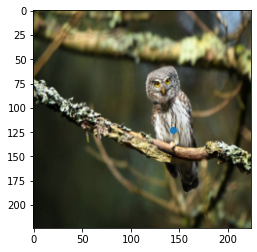

In [ ]:
def show_image(img_tensor, xy, xy_pred=None):
    x, y = xy
    image = np.moveaxis(img_tensor.numpy(), 0, 2)
    image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])

    plt.scatter(x, y)
    if xy_pred is not None:
        x_pred_pixel = int(xy_pred[0])
        y_pred_pixel = int(xy_pred[1])
        plt.scatter(x_pred_pixel, y_pred_pixel)
    plt.imshow(image.clip(0, 1))

show_image(train_set[0]['image'], train_set[0]['xy'])

### 2.2  Network architecture

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

net = resnet18(pretrained=True)
# net = resnet50(pretrained=True)
net.fc = torch.nn.Linear(in_features=512, out_features=2, bias=True)
net = net.to(device)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
loss_function_xy = torch.nn.L1Loss()
loss_function_bce = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [ ]:
for epoch in range(100):

    net.train()
    epoch_loss = 0.

    for batch in train_loader:
        images, xy, labels = batch['image'], batch['xy'], batch['label'] 
        images = images.to(device)
        xy = xy.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        predictions = net(images)

        
        loss = loss_function_xy(predictions, xy)/BATCH_SIZE

        #+ loss_function_bce(predictions[:, :10], labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f'Train: {epoch_loss / len(train_loader)}')

    net.eval()
    epoch_loss = 0.

    for batch in test_loader:
        images, xy, labels = batch['image'], batch['xy'], batch['label'] 
        images = images.to(device)
        xy = xy.to(device)
        labels = labels.to(device)

        predictions = net(images)

        with torch.no_grad():
            
            loss = loss_function_xy(predictions, xy)/BATCH_SIZE

        epoch_loss += loss.item()
    print(f'Test: {epoch_loss / len(test_loader)}')

Train: 2.7337795893351235
Test: 2.5402424335479736
Train: 2.709577480951945
Test: 1.9317924976348877
Train: 2.6621810595194497
Test: 2.1194911003112793
Train: 2.6143321990966797
Test: 2.157566785812378
Train: 2.567158063252767
Test: 1.9984071254730225
Train: 2.5153932571411133
Test: 2.0397679805755615
Train: 2.4578359921773276
Test: 2.150404691696167
Train: 2.416520595550537
Test: 2.199153184890747
Train: 2.377701759338379
Test: 2.2071332931518555
Train: 2.3093111515045166
Test: 2.2887964248657227
Train: 2.256728490193685
Test: 2.216639280319214
Train: 2.1752918561299643
Test: 2.2005109786987305
Train: 2.1517368157704673
Test: 2.0705726146698
Train: 2.079147537549337
Test: 2.095557689666748
Train: 2.021247704823812
Test: 2.0372135639190674
Train: 1.9558439254760742
Test: 1.9809026718139648
Train: 1.8920714060465496
Test: 1.9190607070922852
Train: 1.8638951381047566
Test: 1.8665777444839478
Train: 1.761255423227946
Test: 1.8019939661026
Train: 1.6782961289087932
Test: 1.7542803287506104

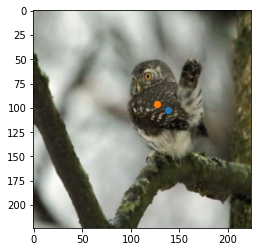

In [ ]:
sample = test_set[4] 

image = sample['image']
xy = sample['xy']
label = sample['label']


with torch.no_grad():
    xy_pred = net(torch.unsqueeze(image, dim=0).to(device)).cpu().numpy()[0]

show_image(image, xy, xy_pred=xy_pred)